In [2]:


from keras.datasets import cifar10
# loading the dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

2023-05-19 19:03:02.902612: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 19:03:03.146046: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 19:03:03.146933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 19:03:04.294645: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
classes =[
"airplane",										
"automobile",										
"bird",										
"cat",										
"deer",										
"dog",										
"frog",										
"horse",										
"ship",										
"truck"]
     

In [4]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils


# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
     

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


2023-05-19 19:03:08.113130: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16000000 exceeds 10% of free system memory.
2023-05-19 19:03:08.119042: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16000000 exceeds 10% of free system memory.
2023-05-19 19:03:08.122132: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16000000 exceeds 10% of free system memory.
2023-05-19 19:03:09.004998: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


2023-05-19 19:03:09.797638: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16000000 exceeds 10% of free system memory.


391/391 [==============================] - 316s 806ms/step - loss: 1.5787 - accuracy: 0.4181 - val_loss: 1.1891 - val_accuracy: 0.5787
Epoch 2/10
391/391 [==============================] - 359s 916ms/step - loss: 1.1084 - accuracy: 0.6067 - val_loss: 0.9291 - val_accuracy: 0.6785
Epoch 3/10
391/391 [==============================] - 338s 865ms/step - loss: 0.9132 - accuracy: 0.6789 - val_loss: 0.7941 - val_accuracy: 0.7204
Epoch 4/10
391/391 [==============================] - 349s 892ms/step - loss: 0.8063 - accuracy: 0.7185 - val_loss: 0.7331 - val_accuracy: 0.7440
Epoch 5/10
391/391 [==============================] - 264s 676ms/step - loss: 0.7295 - accuracy: 0.7458 - val_loss: 0.7372 - val_accuracy: 0.7429
Epoch 6/10
391/391 [==============================] - 274s 702ms/step - loss: 0.6623 - accuracy: 0.7670 - val_loss: 0.7016 - val_accuracy: 0.7537
Epoch 7/10
391/391 [==============================] - 319s 817ms/step - loss: 0.6056 - accuracy: 0.7890 - val_loss: 0.6649 - val_accura

In [5]:

from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img, img_to_array

def predict_fun(image_path):
      img=load_img(image_path ,target_size=(32,32))
      x=img_to_array(img)
      x=np.expand_dims(x,axis=0)
      x=x.astype('float32')/255
      pred=np.argmax(model.predict(x))
      #print(model.predict(x))
      #print(pred)

      print("Predicted output class: ",pred , "\t", classes[pred])
      plt.imshow(mpimg.imread(image_path))


1/1 [==============================] - 0s 150ms/step
Predicted output class:  7 	 horse


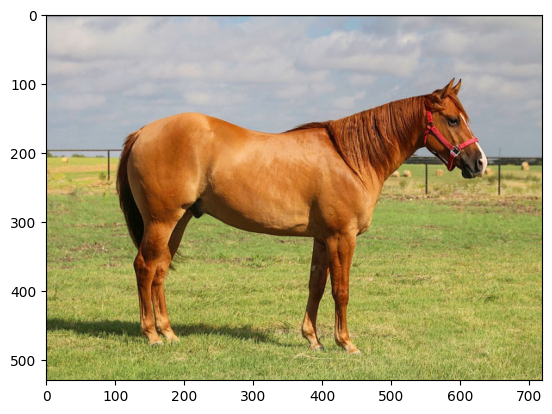

In [6]:
predict_fun("ngua.jpg") 

In [7]:
model.save("cifar10.h5")